In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 34.7MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/insurance.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import pandas as pd

df = pd.read_csv('/content/insurance.csv')
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
print(df['smoker'].unique())
print(df['region'].unique())

['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['age', 'bmi', 'children']])
df[['age', 'bmi', 'children']] = scaled_data

In [ ]:
df.describe()

,age,bmi,children,charges
count,1.337000e+03,1.337000e+03,1.337000e+03,1337.000000
mean,-6.643070e-17,-2.285216e-16,3.852980e-17,13279.121487
std,1.000374e+00,1.000374e+00,1.000374e+00,12110.359656
min,-1.511647e+00,-2.411119e+00,-9.092342e-01,1121.873900
25%,-8.705798e-01,-7.171725e-01,-9.092342e-01,4746.344000
50%,-1.582291e-02,-4.320166e-02,-7.944162e-02,9386.161300
75%,8.389340e-01,6.619260e-01,7.503509e-01,16657.717450
max,1.764921e+00,3.684136e+00,3.239729e+00,63770.428010


In [ ]:
# As charges columns is highly skewed, applying log-transformation

import numpy as np
df['log_charges'] = np.log(df['charges'])

In [ ]:
print(df.head())

        age     sex       bmi  children smoker     region      charges  \
0 -1.440418  female -0.453160 -0.909234    yes  southwest  16884.92400   
1 -1.511647    male  0.509422 -0.079442     no  southeast   1725.55230   
2 -0.799350    male  0.383155  1.580143     no  southeast   4449.46200   
3 -0.443201    male -1.305052 -0.909234     no  northwest  21984.47061   
4 -0.514431    male -0.292456 -0.909234     no  northwest   3866.85520   

   log_charges  
0     9.734176  
1     7.453302  
2     8.400538  
3     9.998092  
4     8.260197  


In [ ]:
# COnverting categorical values to numeric for column 'smoker' using LabelEncode
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['smoker'] = le.fit_transform(df['smoker'])

In [ ]:
print(df['smoker'].value_counts())

smoker
0    1063
1     274
Name: count, dtype: int64


In [ ]:
# Also do the same for 'sex' column
le_sex = LabelEncoder()
df['sex'] = le_sex.fit_transform(df['sex'])

In [ ]:
print(df['sex'].value_counts())

sex
1    675
0    662
Name: count, dtype: int64


In [ ]:
print(df['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [ ]:
# one hot encoding for column 'region'
df = pd.get_dummies(df, columns=['region'], drop_first=True)

In [ ]:
print(df.shape)
print(df.head())

(1337, 10)
        age  sex       bmi  children  smoker      charges  log_charges  \
0 -1.440418    0 -0.453160 -0.909234       1  16884.92400     9.734176   
1 -1.511647    1  0.509422 -0.079442       0   1725.55230     7.453302   
2 -0.799350    1  0.383155  1.580143       0   4449.46200     8.400538   
3 -0.443201    1 -1.305052 -0.909234       0  21984.47061     9.998092   
4 -0.514431    1 -0.292456 -0.909234       0   3866.85520     8.260197   

   region_northwest  region_southeast  region_southwest  
0             False             False              True  
1             False              True             False  
2             False              True             False  
3              True             False             False  
4              True             False             False  


In [ ]:
X = df.drop(columns=['charges', 'log_charges'])
y = df['log_charges']

In [ ]:
print(X.head())
print(y.head())

        age  sex       bmi  children  smoker  region_northwest  \
0 -1.440418    0 -0.453160 -0.909234       1             False   
1 -1.511647    1  0.509422 -0.079442       0             False   
2 -0.799350    1  0.383155  1.580143       0             False   
3 -0.443201    1 -1.305052 -0.909234       0              True   
4 -0.514431    1 -0.292456 -0.909234       0              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  
0    9.734176
1    7.453302
2    8.400538
3    9.998092
4    8.260197
Name: log_charges, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Using RandomForestRegressor model for learning non-linear data effectively
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# predicting for X_test values
y_pred_log = rf_model.predict(X_test)

# Converting values into original form
y_pred = np.exp(y_pred_log)
y_test = np.exp(y_test)

In [ ]:
# Evaluation of model using MAE, MSE, RMSE and R2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MAE: {mae:.2f}")
print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Random Forest R2 Score: {r2:.4f}")

Random Forest MAE: 2118.36
Random Forest RMSE: 4411.39
Random Forest R2 Score: 0.8941


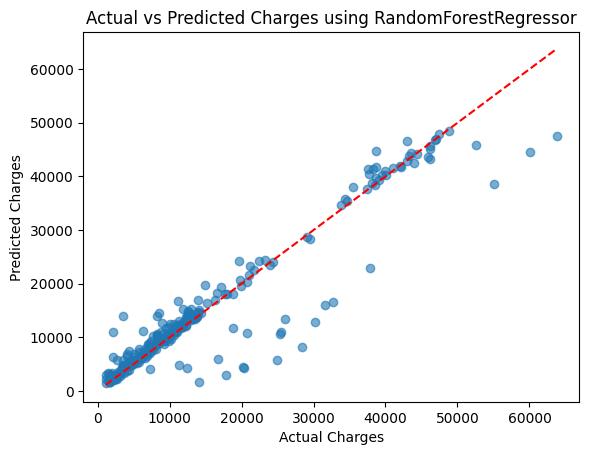

In [ ]:
# Visualization of prediction vs actual data
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges using RandomForestRegressor")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()